Döntési fák, Bagging, Random Forest

### Exercise

In our first exercise we will try to give diagnosis to our patients based on the result of decision tree.

https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset = pd.read_csv(url, names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

In [2]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
len(dataset.columns)

32

In [4]:
# Collect the features and create an array of it: X
X = dataset.iloc[:, 2:32].values

# Convert the target variable into array and save it: Y
Y = dataset.iloc[:, 1].values
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B'

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

X_train

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
        7.007e-02],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
        6.522e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [6]:
# Create a decision tree model with DecisionTreeClassifier: model
# Use 'entropy' as a criterion 
# Try different max_depths and random_states
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state = 0)

# Fit the model on the train datasets
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
# Predict on the test data: Y_pred
Y_pred = classifier.predict(X_test)

In [19]:
# Print the confusion matrix and the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

[[84  6]
 [ 1 52]]
Accuracy: 0.951048951048951


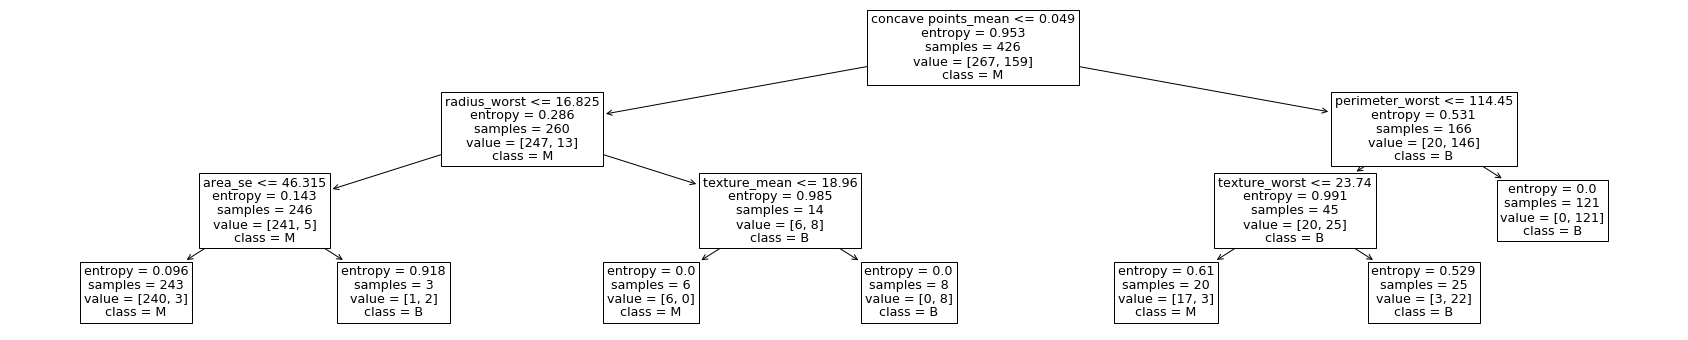

In [24]:
# Visualize the decision tree

from sklearn import tree
plt.figure(figsize=(30,6))
tree.plot_tree(classifier,feature_names=dataset.columns[2:], class_names=["M", "B"])
plt.show()

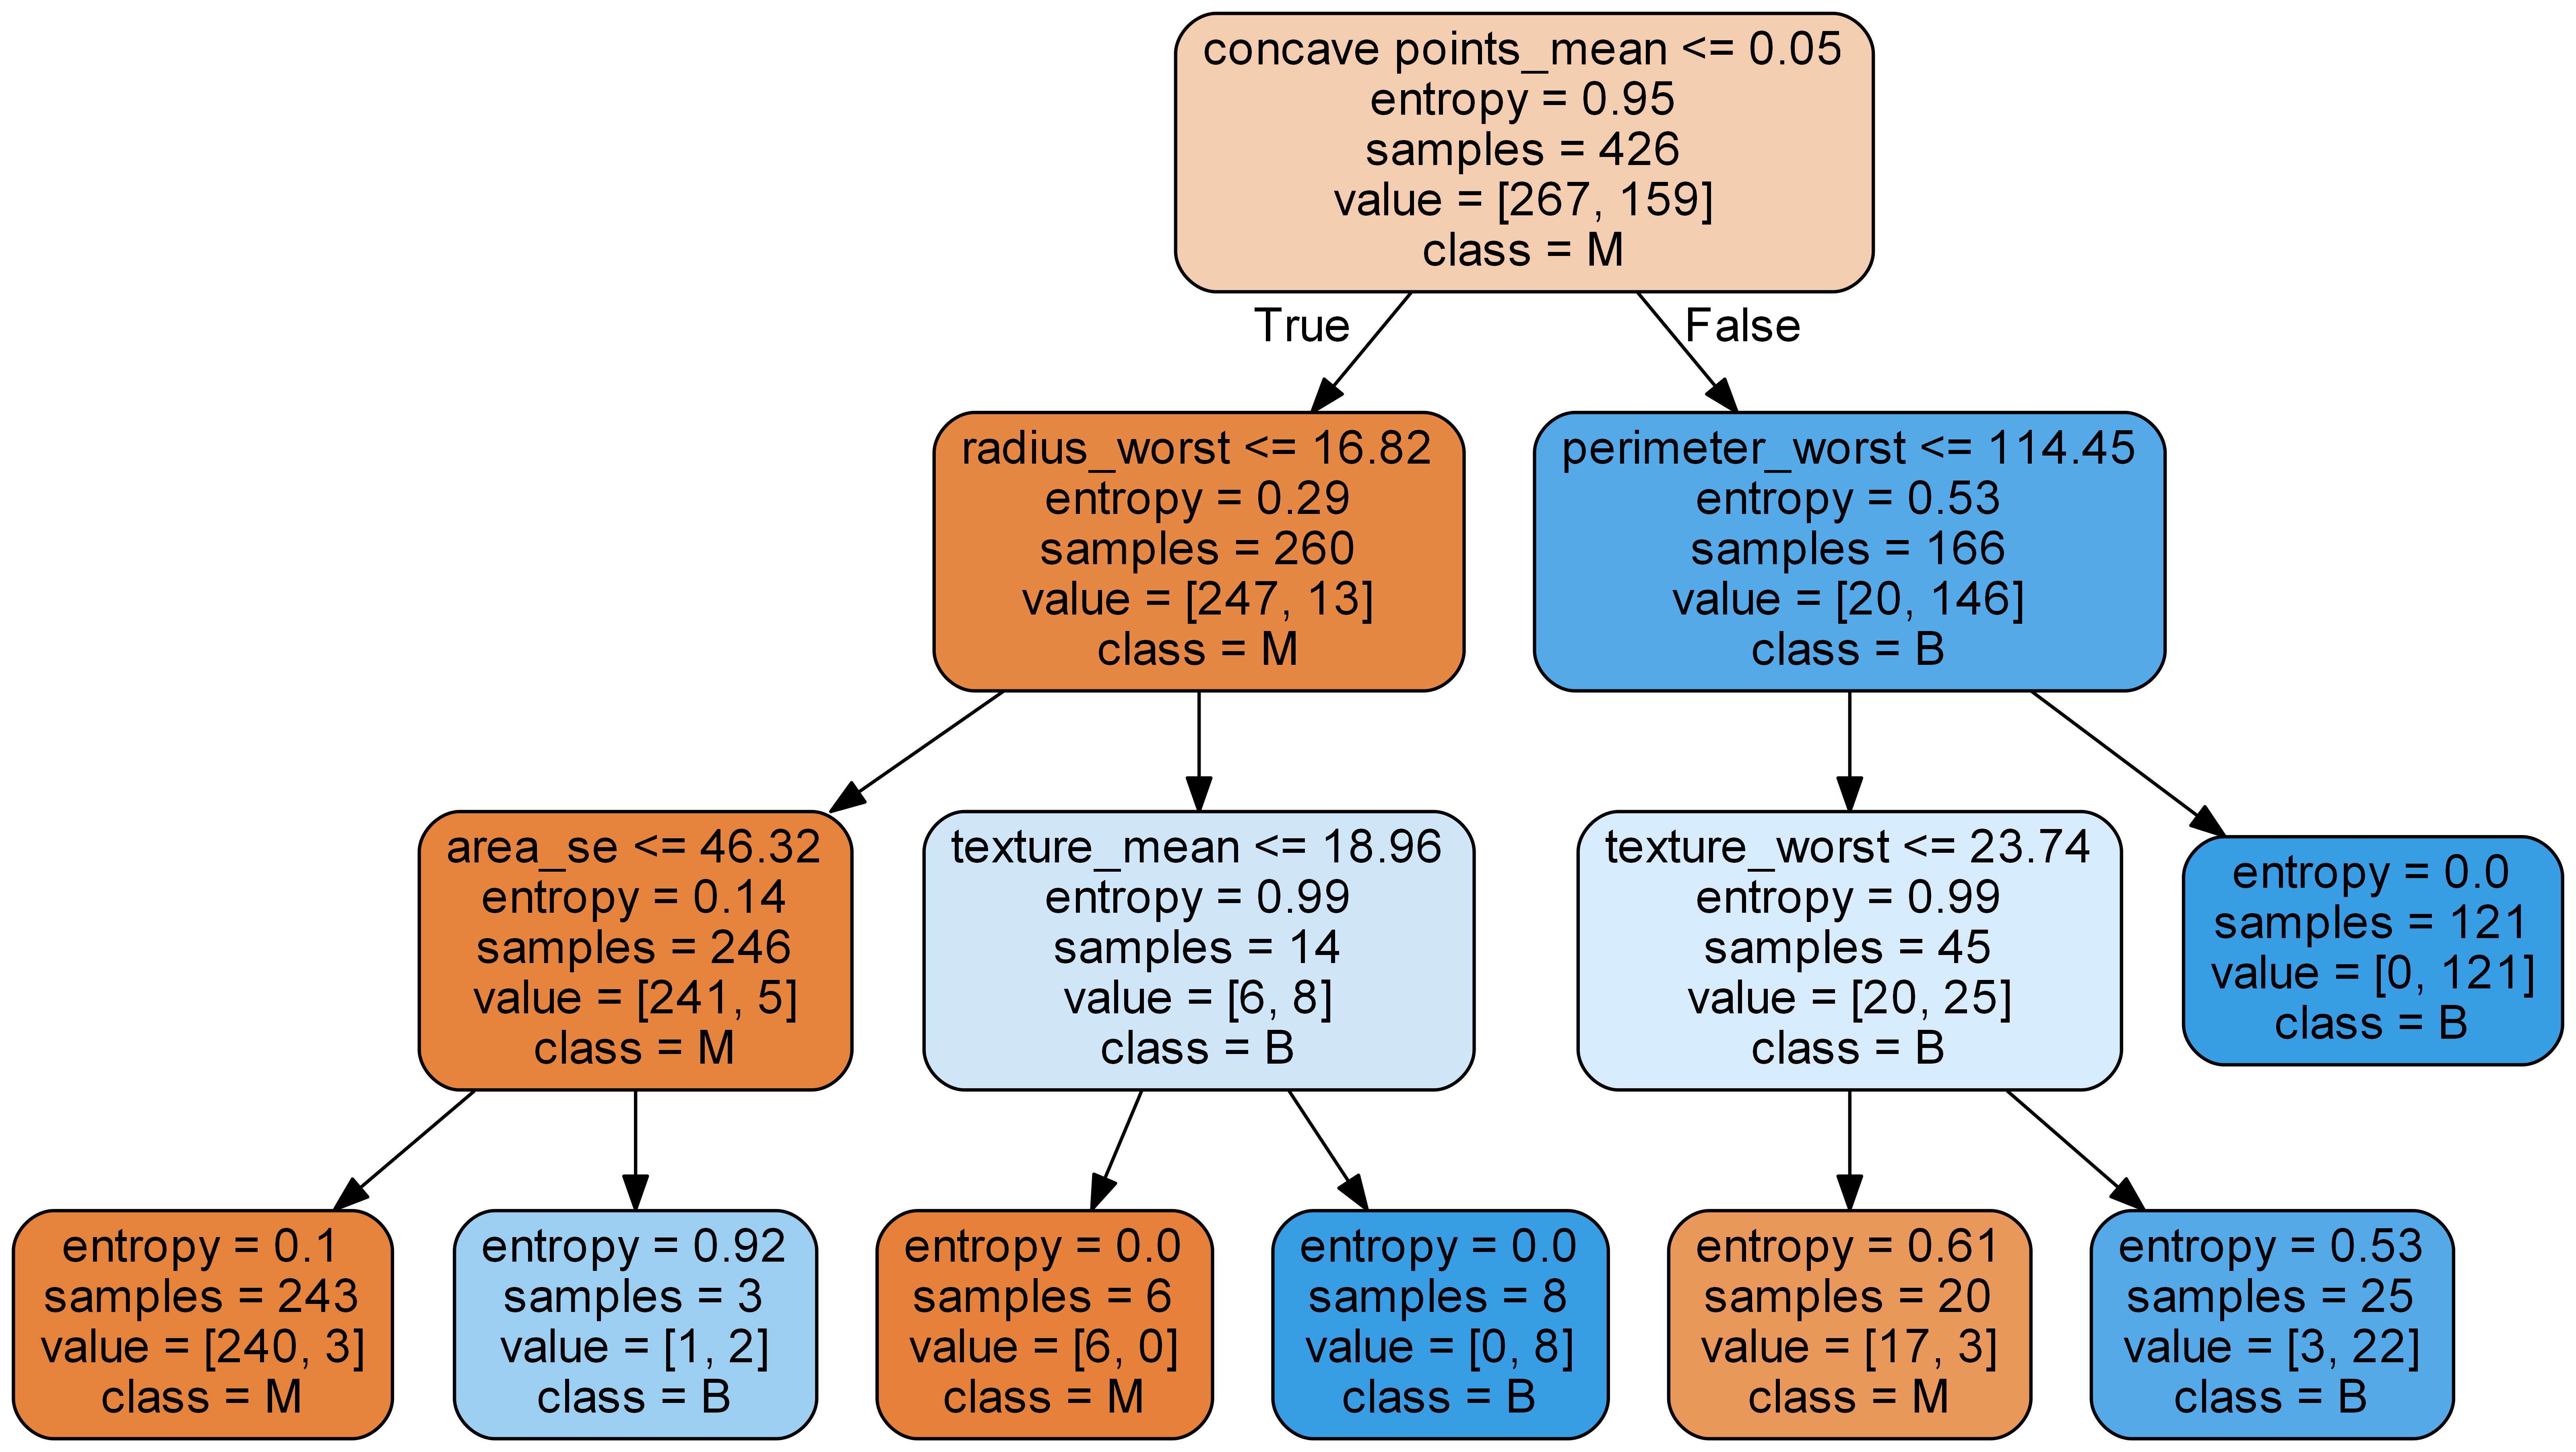

In [25]:
# Visualize the decision tree (other version)

from graphviz import Source
import pydotplus
from sklearn import tree
tree.export_graphviz(classifier, out_file='tree.dot',feature_names=dataset.columns[2:], class_names=["M", "B"],  
                      rounded = True, proportion = False, precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


### Ensemble Predictions

* Bagging: Building multiple models (typically of the same type) from different subsamples of the training dataset. <br>
* Boosting: Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

### Bagging Algorithms
*Bootstrap Aggregation* or *bagging* involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

### Bagged decision trees

* train a bunch of unpruned decision trees on different random subsets of the training data (sampling with replacement) and average their results
* idea: combine the predictions of several base learners to create a more accurate output

### Random forest

* build multiple decision trees and aggregate them to get an accurate result
* What is the **difference** between **Bagged decision trees** and **Random forest**?
    * Actually, the random forest algorithm is actually a bagging algorithm: also here, we draw random bootstrap samples from your training set. 
    * **However**, in addition to the bootstrap samples, **we also draw random subsets of features for training the individual trees**
    * in bagging, we provide each tree with the full set of features
    * Due to the random feature selection, the trees are more independent of each other compared to regular bagging, which often results in better predictive performance
    * it’s also faster than bagging, because each tree learns only from a subset of features

### Exercise

In the following, we will try the bagging algorithm on decision trees and the random forest algorithm.

In the exercise we will use the following [database](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv). <br>

The diabetes dataset is a **binary classification
problem** where it needs to be analysed whether a
patient is suffering from the disease or not on the
basis of many available features in the dataset. 

#### a) Bagged Decision Trees

In [65]:
# importing needed libraries
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
# reading the data
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

# creating array from the data
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [67]:
# Check the database we read and the array we created
print(dataframe.head())
print(X)
print(Y)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.

In [68]:
# split the data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [90]:
# Create the model of bagging classification by using BaggingClassifier: model
# Set a random seed
# Use 100 decision trees
import time
start_time = time.time()
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=2)

# Fit your model
model.fit(X_train, Y_train)

# Evaluate your model with the score function
print(model.score(X_test, Y_test))
time.time()-start_time

0.7135416666666666


0.2313826084136963

In [88]:
# Evaluate the model in an other way:
# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10)
print(results)
# Print the mean of the 10 results
print(results.mean())

[0.72727273 0.79220779 0.76623377 0.67532468 0.77922078 0.79220779
 0.83116883 0.81818182 0.71052632 0.78947368]
0.7681818181818182


#### b) Random Forest

Random forest is an extension of bagged decision trees.

Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features are considered for each split.

In [91]:

# Create the random forest model by using RandomForestClassifier: model
# Use the same random_state as in case of the Bagged Decision Trees
# Use 100 decision trees
# Set max_features=3
from sklearn.ensemble import RandomForestClassifier
start_time=time.time()
model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=2)

# Fit your model
model.fit(X_train, Y_train)

# Evaluate your model with the score function
print(model.score(X_test, Y_test))
time.time()-start_time

0.703125


0.17101597785949707

In [92]:
# Evaluate the model in an other way:
# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10)

# Print the mean of the 10 results
print(results.mean())

0.7630211893369788
